In [106]:
import librosa
import soundfile
import os, pickle, glob
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
Root = "/content/drive/MyDrive/Colab_Notebooks/SpeechEmotion"
os.chdir(Root)
import librosa.display as dp
import IPython.display as ipd
import matplotlib.pyplot as plt

In [90]:
file = glob("/content/drive/MyDrive/Colab_Notebooks/SpeechEmotion/*/*.wav")

In [91]:
# Playing the audio
ipd.Audio(file[1000])

In [93]:
y, sr = librosa.load(file[1]) # to read an audio file y is binary data or raw data of audio file and sr is integer value of sample rate

In [95]:
mfccs = librosa.feature.mfcc(y, sr)

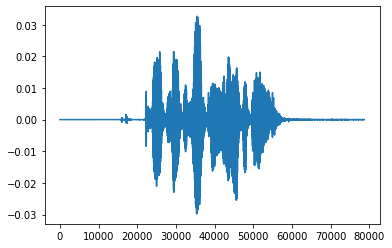

In [96]:
pd.Series(y).plot()

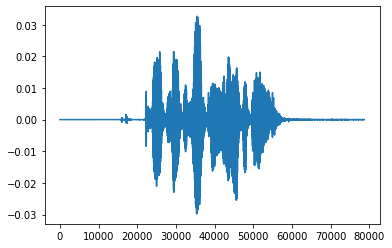

In [97]:
trimmed_audio, _= librosa.effects.trim(y)
pd.Series(trimmed_audio).plot()

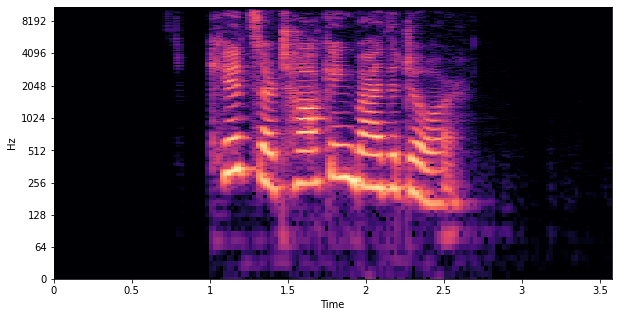

In [99]:
D = librosa.stft(y)
Sdb = librosa.amplitude_to_db(np.abs(D), ref = np.max)
fig, ax = plt.subplots(figsize=(10,5))
img = dp.specshow(Sdb, x_axis='time', y_axis='log', ax=ax)

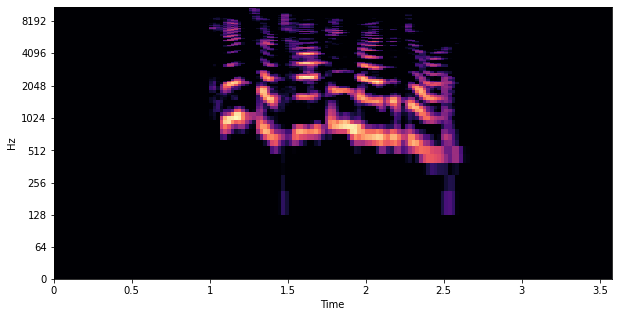

In [100]:
mel = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
Sdb = librosa.amplitude_to_db(np.abs(mel), ref = np.max)
fig, ax = plt.subplots(figsize=(10,5))
img = dp.specshow(Sdb, x_axis='time', y_axis='log', ax=ax)

In [101]:
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
    return result

In [102]:
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

observed_emotions=['calm', 'happy', 'fearful', 'disgust']

In [103]:
def load_data(test_size=0.2):
    x,y=[],[]
    for file in glob.glob("/content/drive/MyDrive/Colab_Notebooks/SpeechEmotion/Actor_*/*.wav"):
        #file = file[:, 0]
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)

In [107]:
x_train,x_test,y_train,y_test=load_data(test_size=0.25)

In [108]:
x_train

array([[-6.03183716e+02,  6.21047974e+01,  5.61033130e-01, ...,
         8.99681993e-07,  6.97375810e-08,  7.52111440e-09],
       [-5.84636414e+02,  5.39467316e+01, -2.36827564e+01, ...,
         1.74139728e-07,  1.79210993e-08,  8.14861689e-09],
       [-7.21003662e+02,  8.94918213e+01,  1.21810207e+01, ...,
         6.46843219e-08,  1.21848869e-08,  7.54230101e-09],
       ...,
       [-6.85264465e+02,  6.60422897e+01, -5.30571079e+00, ...,
         2.12450662e-08,  6.93423008e-09,  6.15550366e-09],
       [-6.76945007e+02,  7.37148895e+01, -2.69023075e+01, ...,
         8.11637761e-08,  1.09651106e-08,  6.93824154e-09],
       [-8.30281677e+02,  7.08854446e+01,  1.60717125e+01, ...,
         5.77896220e-09,  5.49419799e-09,  5.50223644e-09]])

In [109]:
print((x_train.shape[0], x_test.shape[0]))

(573, 191)


In [110]:
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)
model.fit(x_train,y_train)


MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [111]:
y_pred=model.predict(x_test)

In [112]:
y_pred

array(['calm', 'disgust', 'happy', 'fearful', 'calm', 'disgust',
       'disgust', 'happy', 'happy', 'fearful', 'fearful', 'happy', 'calm',
       'happy', 'happy', 'disgust', 'calm', 'happy', 'fearful', 'calm',
       'disgust', 'fearful', 'calm', 'disgust', 'calm', 'calm', 'disgust',
       'calm', 'calm', 'fearful', 'calm', 'happy', 'calm', 'disgust',
       'disgust', 'happy', 'calm', 'happy', 'disgust', 'fearful',
       'disgust', 'happy', 'fearful', 'fearful', 'happy', 'disgust',
       'calm', 'disgust', 'disgust', 'fearful', 'happy', 'disgust',
       'happy', 'calm', 'fearful', 'fearful', 'calm', 'fearful', 'calm',
       'fearful', 'fearful', 'fearful', 'fearful', 'calm', 'fearful',
       'fearful', 'calm', 'fearful', 'calm', 'calm', 'happy', 'calm',
       'calm', 'disgust', 'calm', 'disgust', 'fearful', 'happy',
       'fearful', 'happy', 'disgust', 'disgust', 'happy', 'happy',
       'fearful', 'disgust', 'happy', 'happy', 'disgust', 'calm',
       'disgust', 'happy', 'f

In [113]:
print(accuracy_score(y_test, y_pred))

0.7015706806282722


In [114]:
df=pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})
df.head(20)

,Actual,Predicted
0,calm,calm
1,disgust,disgust
2,happy,happy
3,happy,fearful
4,calm,calm
5,disgust,disgust
6,disgust,disgust
7,happy,happy
8,happy,happy
9,fearful,fearful


In [115]:
with open('modelForPrediction1.sav', 'wb') as f:
    pickle.dump(model,f)

In [116]:
filename = 'modelForPrediction1.sav'
loaded_model = pickle.load(open(filename, 'rb')) # loading the model file from the storage

feature=extract_feature("/content/drive/MyDrive/Colab_Notebooks/SpeechEmotion/Actor_01/03-01-03-01-01-01-01.wav", mfcc=True, chroma=True, mel=True)

feature=feature.reshape(1,-1)

prediction=loaded_model.predict(feature)
ipd.Audio("/content/drive/MyDrive/Colab_Notebooks/SpeechEmotion/Actor_01/03-01-03-01-01-01-01.wav")

In [117]:
#By listening to the audio we can make out that the speaker is happy 
print(prediction)

['happy']
